# Insights into the 2016 Seattle AirBNB Data

## Preliminaries

In [1]:
# from IPython.core.interactiveshell import InteractiveShell 
# InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

pd.set_option('display.max_columns', None)
# pd.reset_option("display.max_columns")

## Introduction

AirBNB has come up with a new business idea. Private individuals provide accommodation via the AirBNB website. As this is publicly available through the website, it can be collected and is, for example, available on http://insideairbnb.com/. For the purpose of this project, the data was downloaded from https://www.kaggle.com. It contains listings for the city Seattle and the years 2016 and 2017.

## Gathering and Reading the Data

Download data https://www.kaggle.com/airbnb/seattle/ via kaggle CLI to data folder.

kaggle datasets download -d airbnb/seattle --unzip

In [2]:
# read the data
df_calendar = pd.read_csv('data/calendar.csv')
df_listings = pd.read_csv('data/listings.csv')
df_reviews = pd.read_csv('data/reviews.csv')

## Assessing the Data

In [3]:
print(f'The calendar dataset contains {df_calendar.shape[0]} entries and {df_calendar.shape[1]} features.')
print(f'The listings dataset contains {df_listings.shape[0]} entries and {df_listings.shape[1]} features.')
print(f'The reviews dataset contains {df_reviews.shape[0]} entries and {df_reviews.shape[1]} features.')

The calendar dataset contains 1393570 entries and 4 features.
The listings dataset contains 3818 entries and 92 features.
The reviews dataset contains 84849 entries and 6 features.


In [4]:
df_calendar.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
earliest_date = df_calendar.date.min()
print(f'The earliest date in the calendar dataset is: {earliest_date}')

The earliest date in the calendar dataset is: 2016-01-04


In [6]:
df_reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [7]:
df_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [8]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [9]:
# df_listings.info()
# df_calendar.info()
# df_reviews.info()
# df_listings.property_type.unique()
# df_listings.room_type.value_counts()

I will use only the listings and calendar datasets in this project. 

The reviews dataset includes reviews from users per stay and listing. For example, it could be used for sentiment analyses by checking the correlation between the individual reviews and the overall rating of the listing.

The listings and the calendar datasets will be explored separately.

I will ask three questions:

1. How does the time of the year affect the availabilities and the prices? The calendar dataset will be used here.

2. What features have the biggest impact on the price? The listings dataset will be used.

3. What amenities influence the rating? Are there any amenities that can be easily added to provide value? Again, I will look into the listings dataset.


## Data Preparation

### Helper Functions

In [10]:
# helper functions

def get_year_from_date(row):
    '''Extract year from date'''
    return int(row['date'].split('-')[0])
    
def get_month_from_date(row):
    '''Extract month from date'''
    return int(row['date'].split('-')[1])

def t_f_to_boolean(i):
    '''Convert string boolean into boolean'''
    
    if i == 't':
        i = i.replace('t','1')
    elif i == 'f':
        i = i.replace('f','0')
    else:
        i = '0'
    return int(i)

def price_to_float(i):
    '''Convert price into float'''
    if type(i) == str:
        i = i.replace('$','')
        i = i.replace(',','')
        i = float(i)
    return i

def get_val_from_list(row, column, value):
    ''' Set value for dummy column'''
    val = 0.0
    try:
        vals = row[column].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val

def rename_features(features):
    '''Beautify feature labels for charts'''
    to_be_replaced = ['amenities_', 'group_cleansed_']
    for x in to_be_replaced:
        features = [f.replace(x, '') for f in list(features)]
    features = [f.replace('_', ' ').title() for f in features]
    
    return features

### Preparing the Calendar Dataset for Question 1

In [11]:
def clean_calendar_dataset(df):
    '''
    Takes the calendar datasets and cleans it to answer question 1 (price and availabilites).
    
    :param df: calendar dataset  
    :return df: cleaned dataset
    '''
    
    # get year from date
    df['year'] = df.apply(lambda row: get_year_from_date(row), axis=1)
    
    # get month from date
    df['month'] = df.apply(lambda row: get_month_from_date(row), axis=1)
    
    # available column to boolean from string
    df['available'] = df.available.apply(t_f_to_boolean)
    
    # price to float
    df['price'] = df.price.apply(price_to_float)
    
    # drop date column
    df =  df.drop(columns=['date'])
    
    return df

In [12]:
# clean calendar dataset
df_calendar = clean_calendar_dataset(df_calendar)

In [13]:
df_calendar.head(5)

,listing_id,available,price,year,month
0,241032,1,85.0,2016,1
1,241032,1,85.0,2016,1
2,241032,0,NaN,2016,1
3,241032,0,NaN,2016,1
4,241032,0,NaN,2016,1


### Preparing the Listings Dataset for Question 2

In [14]:
def clean_listings_for_question_2(df):
    '''
    Takes the listings dataset and cleans it to answer question 2 (impact).
    
    :param df: listings dataset
    :return df: cleanded dataset
    '''
    
    colums_to_drop = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 
                      'space', 'description', 'experiences_offered', 'neighborhood_overview', 
                      'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 
                      'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 
                      'host_location', 'host_about', 'host_neighbourhood', 'host_response_rate', 
                      'host_acceptance_rate', 'neighbourhood', 'neighbourhood_cleansed', 
                      'host_thumbnail_url', 'host_picture_url', 'host_listings_count', 
                      'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 
                      'host_identity_verified', 'street', 'city', 'state', 'zipcode', 'market', 
                      'smart_location', 'country_code', 'country', 'latitude', 'longitude', 
                      'is_location_exact', 'beds', 'bed_type', 'square_feet', 'weekly_price', 
                      'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 
                      'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated', 
                      'has_availability', 'availability_30', 'availability_60', 'availability_90', 
                      'availability_365', 'calendar_last_scraped', 'first_review', 'last_review', 
                      'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                      'review_scores_communication', 'review_scores_location', 'review_scores_value', 
                      'requires_license', 'license', 'jurisdiction_names', 'instant_bookable', 
                      'cancellation_policy', 'require_guest_profile_picture', 
                      'require_guest_phone_verification', 'calculated_host_listings_count', 
                      'reviews_per_month', 'amenities']

    # drop columns that don't provide useful information in my opinion
    df.drop(colums_to_drop, axis=1, inplace=True)

    # remove listings without ratings (=647) and without values f
    # or host_is_superhost and property_type (~10 and less) or are not needed
    df = df.dropna(subset=['review_scores_rating', 'host_is_superhost', 'property_type'])

    # nan get replaced by 48 assuming that they will reply, but rather later than sooner
    mapper = {'within an hour':1, 
                    'within a few hours':4,
                    'within a day': 24,
                    'a few days or more':48}

    # replace host_response_time by figure 
    df['host_response_time'] = df['host_response_time'].replace(mapper)
    df['host_response_time'] = df['host_response_time'].replace(np.nan, 48)

    # fillna
    df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
    df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])

    # string to boolean
    df['host_is_superhost'] = df.host_is_superhost.apply(t_f_to_boolean)

    # price to float
    df['price'] = df.price.apply(price_to_float)

    # get dummies for categorical features (here: neighbourhood_group_cleansed, room_type, property_type)
    df = pd.get_dummies(df)
    
    return df

In [15]:
# clean listings dataset regarding question 2
df_impact = df_listings.copy(deep=True)
df_impact = clean_listings_for_question_2(df_impact)

<ipython-input-14-67f94fcc7160>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_response_time'] = df['host_response_time'].replace(mapper)
<ipython-input-14-67f94fcc7160>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_response_time'] = df['host_response_time'].replace(np.nan, 48)
<ipython-input-14-67f94fcc7160>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [16]:
df_impact.head(5)

,host_response_time,host_is_superhost,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,4.0,0,4,1.0,1.0,85.0,207,95.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0,1,4,1.0,1.0,150.0,43,96.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4.0,0,11,4.5,5.0,975.0,20,97.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1.0,0,6,2.0,3.0,450.0,38,92.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
5,48.0,0,2,1.0,1.0,120.0,17,95.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


### Preparing the Listings Dataset for Question 3

In [17]:
def split_amenities_into_columns(df, column):
    '''Split the list of amenities into dummy columns for each listing and set value 1 or 0 based on availability'''
    
    d = defaultdict(int)
    
    for row in df[column]:
        for value in row.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            d[value] += 1
    
    # removed (does not make sense/only one occurence)
    d.pop('')
    d.pop('Washer / Dryer')

    for k, _ in d.items():
        df[column + '_' + k] = df.apply(lambda row: get_val_from_list(row, column, k),axis=1)

    return

def clean_listings_for_question_3(df):
    '''
    Takes the listings dataset and cleans it to answer question 3 (amenities).
    
    :param df: listings dataset
    :return df: cleanded dataset
    '''
    
    # drop Nan rows
    df = df[['amenities', 'review_scores_rating']].dropna()
    split_amenities_into_columns(df, 'amenities')
    df = df.drop(columns=['amenities'])
    
    return df

In [18]:
# clean listings dataset regarding question 3
df_amenities = df_listings.copy(deep=True)
df_amenities = clean_listings_for_question_3(df_amenities)

In [19]:
df_amenities.head(5)

,review_scores_rating,amenities_TV,amenities_Cable TV,amenities_Internet,amenities_Wireless Internet,amenities_Air Conditioning,amenities_Kitchen,amenities_Heating,amenities_Family/Kid Friendly,amenities_Washer,amenities_Dryer,amenities_Free Parking on Premises,amenities_Buzzer/Wireless Intercom,amenities_Smoke Detector,amenities_Carbon Monoxide Detector,amenities_First Aid Kit,amenities_Safety Card,amenities_Fire Extinguisher,amenities_Essentials,amenities_Pets Allowed,amenities_Pets live on this property,amenities_Dog(s),amenities_Cat(s),amenities_Hot Tub,amenities_Indoor Fireplace,amenities_Shampoo,amenities_Breakfast,amenities_24-Hour Check-in,amenities_Hangers,amenities_Hair Dryer,amenities_Iron,amenities_Laptop Friendly Workspace,amenities_Suitable for Events,amenities_Elevator in Building,amenities_Wheelchair Accessible,amenities_Gym,amenities_Lock on Bedroom Door,amenities_Pool,amenities_Other pet(s),amenities_Smoking Allowed,amenities_Doorman
0,95.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,96.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,97.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,92.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,95.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Question 1: average price per month and availability per month

In [20]:
# we will ignore 2017 values (7636, compared to 1385934 for 2016)
df_calendar.year.value_counts().to_frame()

,year
2016,1385934
2017,7636


In [21]:
availability_perc_by_month = pd.Series([12])
average_price_of_listing_by_month = pd.Series([12])

for i in range(1, 13):
    # we consider only the year 2016
    df_this_month = df_calendar[(df_calendar['month'] == i) & (df_calendar['year'] == 2016)]
    # get the mean of the availability per month
    availability_perc_by_month[i] = df_this_month.groupby(['listing_id']).mean().available.mean()
    # get the mean of the price per month
    average_price_of_listing_by_month[i] = df_this_month.groupby(['listing_id']).mean().price.mean()

In [22]:
# drop row 0 (value = 12)
availability_perc_by_month = availability_perc_by_month.drop(0)
average_price_of_listing_by_month = average_price_of_listing_by_month.drop(0)

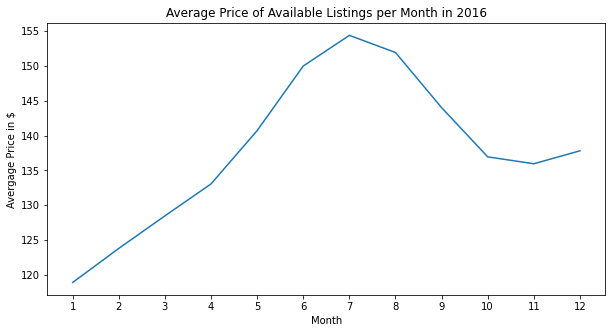

In [23]:
# plot average_price_of_listing_by_month

plt.figure(figsize=(10,5))
plt.plot(average_price_of_listing_by_month)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Avergage Price in $')
plt.xlabel('Month')
plt.title('Average Price of Available Listings per Month in 2016')
plt.savefig('average_price_o_available_listings_per_month_in_2016.png')
plt.show()

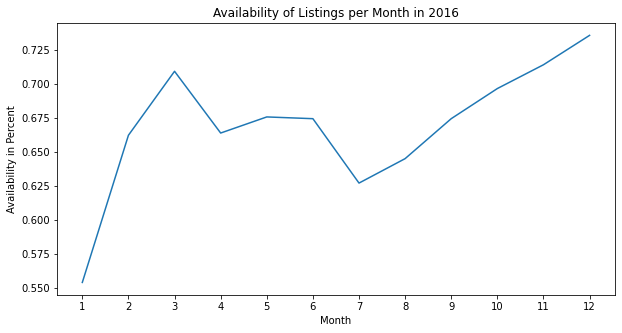

In [24]:
# plot availability_perc_by_month

plt.figure(figsize=(10,5))
plt.plot(availability_perc_by_month)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Availability in Percent')
plt.xlabel('Month')
plt.title('Availability of Listings per Month in 2016')
plt.savefig('availability_of_listings_per_month_in_2016.png')
plt.show()

### Algorithm of Choice: Random Forest Algorithm (Regressor)

I will use the Random Forest Algorithm for Question 2 and 3. As it is not a classification task but our labels are numeric and continuous, I will use the Regressor algorithm. The Random Forest Algorithm is easy to implement, provides robust results, does not need normalised data and as computational power is not an issue given the size of our datasets, it seems to be a good choice here.

### Question 2: what are the biggest factors driving the price? (ex amenities)

In [25]:
# split dataset first into feature and label datasets, and then into train and test datasets
features = [s for s in list(df_impact.columns) if s != 'price']
X = df_impact[features]
y = df_impact['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
print(f'Number of features used: {len(features)}')

Number of features used: 43


In [27]:
# create instance
regr = RandomForestRegressor(n_estimators=100, criterion='mse', n_jobs=2, random_state=42)

# fit data
regr.fit(X_train, y_train)

# predict
y_train_preds = regr.predict(X_train)
y_test_preds = regr.predict(X_test)

# print results in terms of MSE and R^2
print(f'Random Forest MSE train: {mean_squared_error(y_train, y_train_preds):.3f}, test: {mean_squared_error(y_test, y_test_preds):.3f}')
print(f'Random Forest R^2 train: {r2_score(y_train, y_train_preds):.3f}, test: {r2_score(y_test, y_test_preds):.3f}')

Random Forest MSE train: 700.025, test: 2602.436
Random Forest R^2 train: 0.914, test: 0.676


In [28]:
# extract feature importance and print table
df_feature_importance = pd.DataFrame(regr.feature_importances_, index=features, columns=['feature_importance']).sort_values('feature_importance', ascending=False)
df_feature_importance.iloc[:15]

,feature_importance
bedrooms,0.371344
number_of_reviews,0.096621
bathrooms,0.092827
accommodates,0.077302
room_type_Entire home/apt,0.067147
host_response_time,0.050826
review_scores_rating,0.048203
neighbourhood_group_cleansed_Downtown,0.030995
neighbourhood_group_cleansed_Magnolia,0.020079
neighbourhood_group_cleansed_Cascade,0.018485


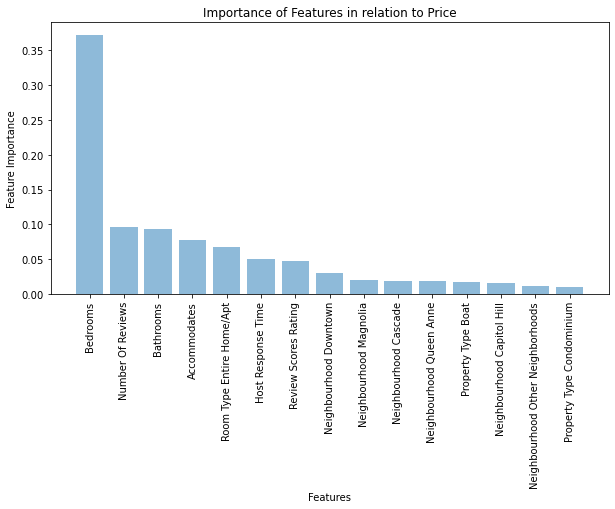

In [29]:
#create chart
features = df_feature_importance.index[:15]
# pretty print features
features = rename_features(features)
y_pos = np.arange(len(features))
scores = df_feature_importance['feature_importance'][:15]

#plot feature importances
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.title('Importance of Features in relation to Price')
plt.savefig('importance_of_features_in_relation_to_price.png')

### Question 3: what amenities drive the review score? What should be available, what can easily be added to provide value?

In [30]:
# split dataset first into feature and label datasets, and then into train and test datasets
features = df_amenities.columns[1:]
X = df_amenities[features]
y = df_amenities['review_scores_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
# create instance
regr = RandomForestRegressor(n_estimators=100, criterion='mse', n_jobs=2, random_state=42)

# fit data
regr.fit(X_train, y_train)

# predict
y_train_preds = regr.predict(X_train)
y_test_preds = regr.predict(X_test)

# print results in terms of MSE and R^2
print(f'Random Forest MSE train: {mean_squared_error(y_train, y_train_preds):.3f}, test: {mean_squared_error(y_test, y_test_preds):.3f}')
print(f'Random Forest R^2 train: {r2_score(y_train, y_train_preds):.3f}, test: {r2_score(y_test, y_test_preds):.3f}')

Random Forest MSE train: 10.942, test: 49.251
Random Forest R^2 train: 0.758, test: -0.232


In [32]:
# extract feature importance and print table
df_feature_importance = pd.DataFrame(regr.feature_importances_, index=features, columns=['feature_importance']).sort_values('feature_importance', ascending=False)
df_feature_importance.iloc[:15]

,feature_importance
amenities_Family/Kid Friendly,0.056405
amenities_Cable TV,0.049895
amenities_TV,0.048386
amenities_Free Parking on Premises,0.046322
amenities_Essentials,0.043800
amenities_Carbon Monoxide Detector,0.039208
amenities_First Aid Kit,0.038696
amenities_Fire Extinguisher,0.035491
amenities_Internet,0.035428
amenities_Elevator in Building,0.034197


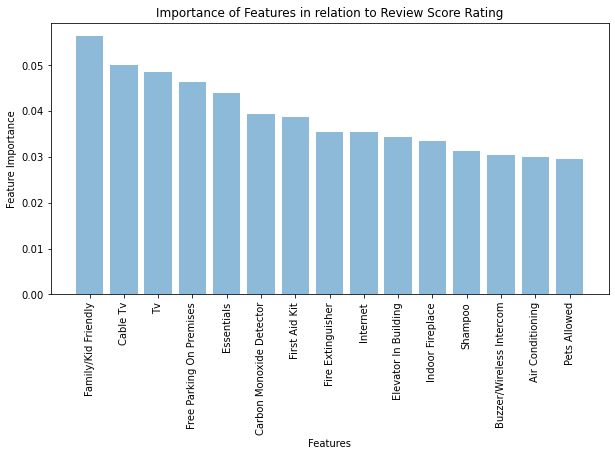

In [33]:
#create chart
features = df_feature_importance.index[:15]
# pretty print features
features = rename_features(features)
y_pos = np.arange(len(features))
scores = df_feature_importance['feature_importance'][:15]

#plot feature importances
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.title('Importance of Features in relation to Review Score Rating')
plt.savefig('importance_of_amenities_in_relation_to_review_score_rating.png')

## Conclusion

The Seattle AirBNB data for 2016 shows that it is most expensive to get an AirBNB in July. This is not surprising. The demand during the summer (good weather conditions, long holidays) should be higher than during the rest of the year. Prices are quite low at the beginning of the year and in November. There is a little increase again in December (Christmas time).

The earliest date of the dataset was January 4, 2016. The provided data was gathered around this date or just before this date. This has to be taken into account when interpreting the results. This has implications especially for the results of the Availability of the Listing per Month. It is at its lowest in January at around 55%. This is understandable because all visitors who book on short notice cause a higher occupancy compared to the same listings on year out, for example. The local peak in March, around 71%, suggests that the effect of those short-term bookings is not that prevalent yet. As with the price, availability in July is quite low at around 62%. This is also understandable since the visitors want to lock in the place for the stay well in advance during high season.

The second question is about the impact of features on the price. After deleting redundant columns (i.e. features) and information that I considered irrelevant, I am down to 43 features that will be examined.

I used the Random Forest Regressor for this task. The model shows an R-squared of 0.921 for the Train data. This is a great result and the model fits the real data quite well. Unfortunately, the R-squared figure for the Test data is not as high with 0.606. It can be concluded that the model does not generalize too well. But the Test R-squared is still reasonably high and the model still does a good job in explaining the importance of the features on the price.

When looking into the feature importance, you that one feature is by far the most important one: the number of bedrooms (38.4%). This is followed by the number of bathrooms (11.3%), the number of people it accommodates (8.5%), and the number of reviews (8.1%). There is certainly a correlation between number of bedrooms, bathrooms, and accommodates. Number of reviews certainly shows that the pricey listings get booked more often and/or as they are well in demand the price might be adjusted accordingly. What you can also see, even though the impact is not really significant (3.2% and less), that the neighbourhoods have also an impact on the price. Downtown, for example, has the highest impact of all the neighbourhoods. The reason could be that it can be considered the city center which offers short distances to many Seattle sights.

The third and last question deals with the amenities and the review scores rating. I try to find out if there are certain amenities that have an impact on the review and that can easily be added to provide value if missing so far (e.g. a first aid kit can certainly provided easily whereas it would be much more difficult if not impossible to add an indoor fireplace in a regular apartment).

The Random Forest Regressor is also used here. The R-squared value of 0.784 based on the Trained data looks promising, but after checking the trained model against the Test data it shows that it does not generalize very well and fits the data really poorly. The R-squared value for Test data is -0.156. The results should probably be dismissed. Perhaps using a different algorithm might lead to better and more significant results.

Nevertheless, when looking into the feature importance, you can possibly still draw a few conclusions (even though you should treat them with some suspicion). Over all, there is not a feature as dominating as the number of bedrooms of question two. The most important feature is Family/Kid Friendly (6.7%), followed by TV (4.7%) and Cable TV (4.6%).

When looking at features with 3% and more, the following might be able to provide value and should be added to the listing if possible: TV, Cable TV, Essentials, Fire Extinguisher, Internet, First Aid Kid, Carbon Monoxide Detector, and Shampoo.

The following features might not as easily be added or not all (all above 3%): Family/Kid Friendly, Free Parking on Premises, Elevator in Building, Indoor Fireplace, Buzzer/Wireless Intercom, and Gym. Here, you should just focus on the ones stated above and try to add those to provide value and that potentially increase your review score instead of adding this Indoor Fireplace for example.
